An introduction to machine learning with scikit-learn
=====================================================

Machine learning: the problem setting
-------------------------------------

In general, a learning problem considers a set of n
[samples](https://en.wikipedia.org/wiki/Sample_(statistics)) of data and
then tries to predict properties of unknown data. If each sample is more
than a single number and, for instance, a multi-dimensional entry (aka
[multivariate](https://en.wikipedia.org/wiki/Multivariate_random_variable)
data), it is said to have several attributes or **features**.

We can separate learning problems in a few large categories:

> -   [supervised
>     learning](https://en.wikipedia.org/wiki/Supervised_learning), in
>     which the data comes with additional attributes that we want to
>     predict (Click here &lt;supervised-learning&gt; to go to the
>     scikit-learn supervised learning page).This problem can be either:
>
>     > -   [classification](https://en.wikipedia.org/wiki/Classification_in_machine_learning):
>     >     samples belong to two or more classes and we want to learn
>     >     from already labeled data how to predict the class of
>     >     unlabeled data. An example of classification problem would
>     >     be the handwritten digit recognition example, in which the
>     >     aim is to assign each input vector to one of a finite number
>     >     of discrete categories. Another way to think of
>     >     classification is as a discrete (as opposed to continuous)
>     >     form of supervised learning where one has a limited number
>     >     of categories and for each of the n samples provided, one is
>     >     to try to label them with the correct category or class.
>     > -   [regression](https://en.wikipedia.org/wiki/Regression_analysis):
>     >     if the desired output consists of one or more continuous
>     >     variables, then the task is called *regression*. An example
>     >     of a regression problem would be the prediction of the
>     >     length of a salmon as a function of its age and weight.
>
> -   [unsupervised
>     learning](https://en.wikipedia.org/wiki/Unsupervised_learning), in
>     which the training data consists of a set of input vectors x
>     without any corresponding target values. The goal in such problems
>     may be to discover groups of similar examples within the data,
>     where it is called
>     [clustering](https://en.wikipedia.org/wiki/Cluster_analysis), or
>     to determine the distribution of data within the input space,
>     known as [density
>     estimation](https://en.wikipedia.org/wiki/Density_estimation), or
>     to project the data from a high-dimensional space down to two or
>     three dimensions for the purpose of *visualization*
>     (Click here &lt;unsupervised-learning&gt; to go to the
>     Scikit-Learn unsupervised learning page).

**Training set and testing set**

Machine learning is about learning some properties of a data set and
applying them to new data. This is why a common practice in machine
learning to evaluate an algorithm is to split the data at hand into two
sets, one that we call the **training set** on which we learn data
properties and one that we call the **testing set** on which we test
these properties.

Loading an example dataset
--------------------------

scikit-learn comes with a few standard datasets, for instance the
[iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) and
[digits](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits)
datasets for classification and the [boston house prices
dataset](http://archive.ics.uci.edu/ml/datasets/Housing) for regression.

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

A dataset is a dictionary-like object that holds all the data and some
metadata about the data. This data is stored in the `.data` member,
which is a `n_samples, n_features` array. In the case of supervised
problem, one or more response variables are stored in the `.target`
member. More details on the different datasets can be found in the
dedicated section.

For instance, in the case of the digits dataset, `digits.data` gives
access to the features that can be used to classify the digits samples:

In [4]:
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

and `digits.target` gives the ground truth for the digit dataset, that
is the number corresponding to each digit image that we are trying to
learn:

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

**Shape of the data arrays**

The data is always a 2D array, shape `(n_samples, n_features)`, although
the original data may have had a different shape. In the case of the
digits, each original sample is an image of shape `(8, 8)` and can be
accessed using:

In [6]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

Here is a simple example on this dataset that illustrates how starting from the original problem one can shape the
data for consumption in scikit-learn.

Learning and predicting
-----------------------

In the case of the digits dataset, the task is to predict, given an
image, which digit it represents. We are given samples of each of the 10
possible classes (the digits zero through nine) on which we *fit* an
[estimator](https://en.wikipedia.org/wiki/Estimator) to be able to
*predict* the classes to which unseen samples belong.

In scikit-learn, an estimator for classification is a Python object that
implements the methods `fit(X, y)` and `predict(T)`.

An example of an estimator is the class `sklearn.svm.SVC` that
implements [support vector
classification](https://en.wikipedia.org/wiki/Support_vector_machine).
The constructor of an estimator takes as arguments the parameters of the
model, but for the time being, we will consider the estimator as a black
box:

In [9]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

**Choosing the parameters of the model**

In this example we set the value of `gamma` manually. It is possible to
automatically find good values for the parameters by using tools such as
grid search and cross validation.

We call our estimator instance `clf`, as it is a classifier. It now must
be fitted to the model, that is, it must *learn* from the model. This is
done by passing our training set to the `fit` method. As a training set,
let us use all the images of our dataset apart from the last one. We
select this training set with the `[:-1]` Python syntax, which produces
a new array that contains all but the last entry of `digits.data`:

In [11]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Now you can predict new values, in particular, we can ask to the
classifier what is the digit of our last image in the `digits` dataset,
which we have not used to train the classifier:

In [12]:
clf.predict(digits.data[-1:])

array([8])

The corresponding image is the following:

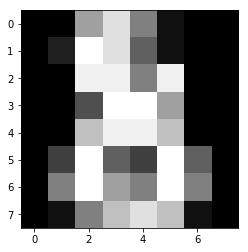

In [19]:
plt.imshow(digits.images[-1], cmap = "gray")

As you can see, it is a challenging task: the images are of poor
resolution. Do you agree with the classifier?

A complete example of this classification problem is available as an
example that you can run and study: http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html